# Exploratory Data Analysis and Visualization of SpaceX Falcon 9 Launch Data


## Introduction


This notebook focuses on exploratory data analysis (EDA) and visualization of SpaceX Falcon 9 launch data using Python.  
The goal is to identify patterns and relationships between launch characteristics such as payload mass, orbit type, launch site, and landing outcomes.

The insights derived from this analysis support feature engineering and predictive modeling performed in later stages of the project.

Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


The Falcon 9 first stage is designed to be reusable through controlled landing techniques. 

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


While successful landings occur on ground pads or drone ships, some missions intentionally perform controlled ocean landings based on mission requirements.

## Objectives

The objectives of this analysis are to:
- Perform exploratory data analysis on SpaceX Falcon 9 launch data
- Visualize relationships between launch parameters and landing outcomes
- Identify features relevant for predictive modeling


----


## Import Required Libraries

The following Python libraries are used for data manipulation and visualization throughout this analysis.


In [16]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


The SpaceX launch dataset is loaded into a Pandas DataFrame to examine its structure, variables, and summary statistics.

In [17]:
df=pd.read_csv("updated_data_falcon92")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


This visualization examines the relationship between flight number, payload mass, and launch outcome.  
Flight number represents the sequence of launch attempts, while payload mass reflects mission complexity.


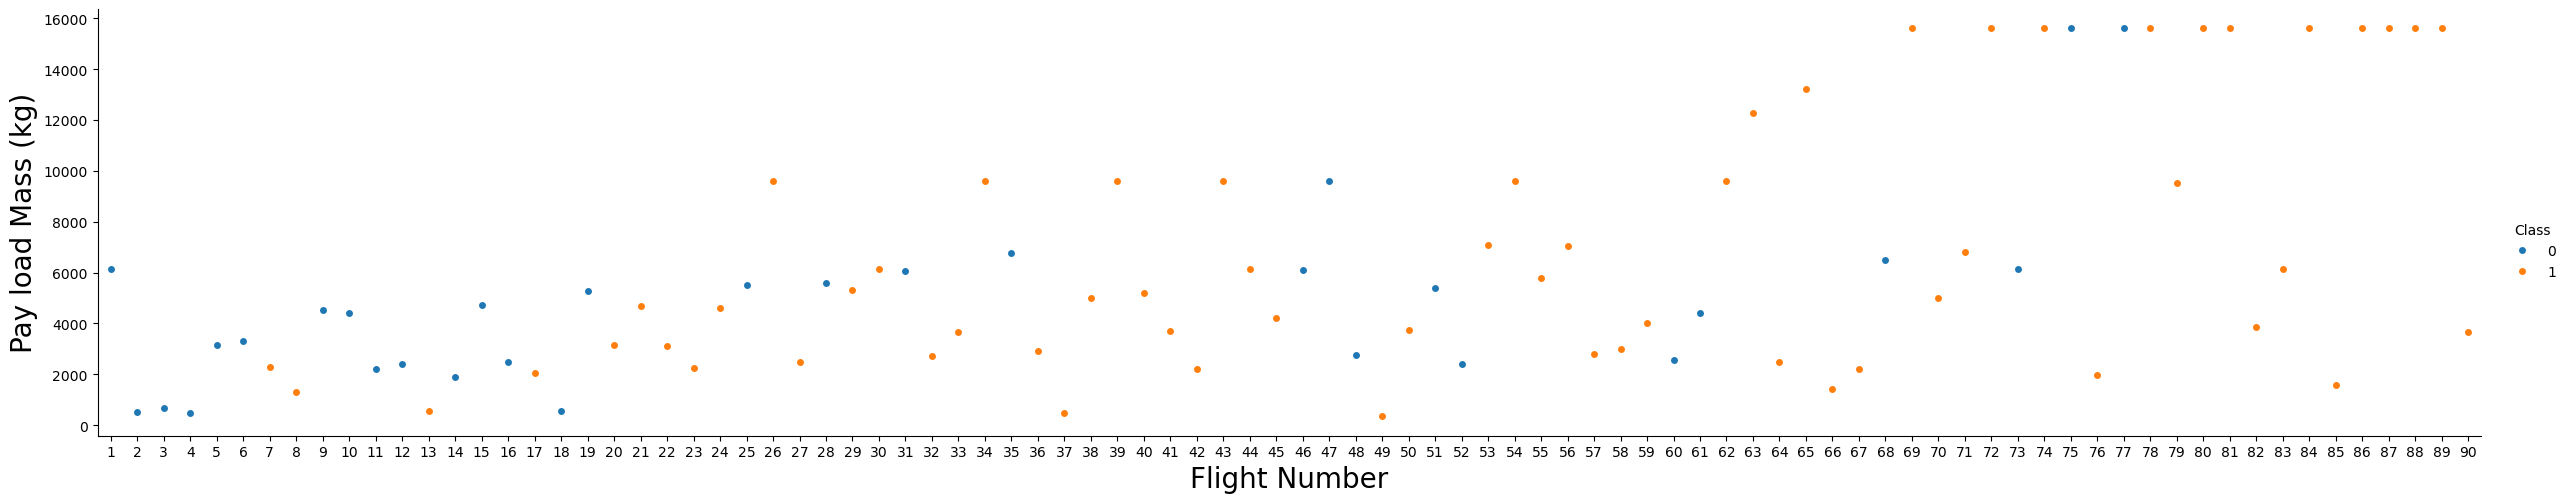

In [18]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### Flight Number vs Launch Site


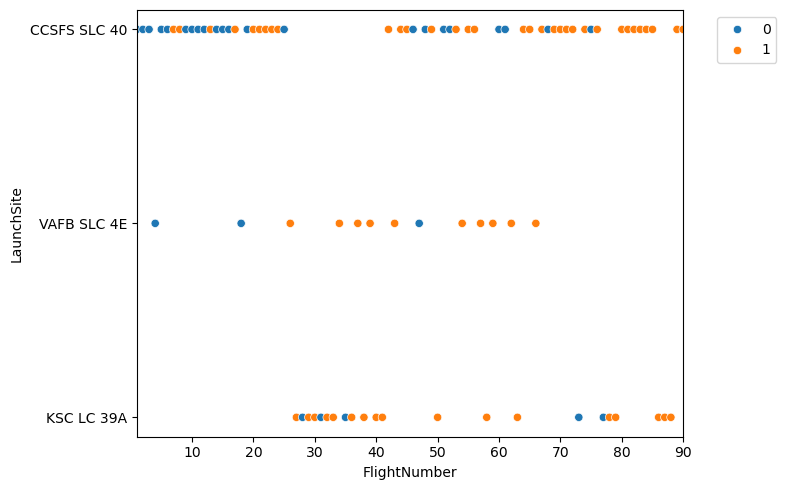

In [19]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
fig = plt.figure(figsize=(8,5))

sns.scatterplot(
    x='FlightNumber',
    y='LaunchSite',
    data=df,
    hue='Class'
)

plt.xlabel('FlightNumber')
plt.ylabel('LaunchSite')
plt.xlim(1, 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


**Observation:**  
The scatter plot shows that CCSFS SLC 40 has hosted the highest number of launches, making it the most frequently used launch site.  
While many launches from this site were successful, it also experienced a higher number of failures, likely due to its early missions and higher launch frequency.

In contrast, VAFB SLC 4E and KSC LC 39A recorded fewer launches but demonstrate a higher proportion of successful outcomes, suggesting improved reliability at these sites.


### Payload Mass vs Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


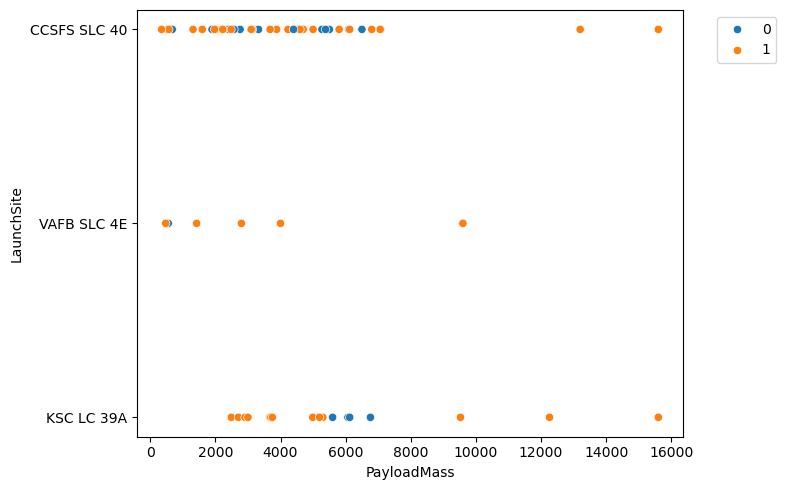

In [20]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
fig = plt.figure(figsize=(8,5))
sns.scatterplot(x='PayloadMass',y='LaunchSite',data=df,hue='Class')
plt.xlabel('PayloadMass')
plt.ylabel('LaunchSite')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Observation:**  
The scatter plot indicates that VAFB SLC 4E did not conduct missions with heavy payloads exceeding 10,000 kg, whereas CCSFS SLC 40 and KSC LC 39A handled a wider range of payload masses, including heavier missions.


### Success Rate by Orbit Type


This visualization compares mission success rates across different orbit types to identify which orbits demonstrate higher reliability.


Let's create a `bar chart` for the sucess rate of each orbit


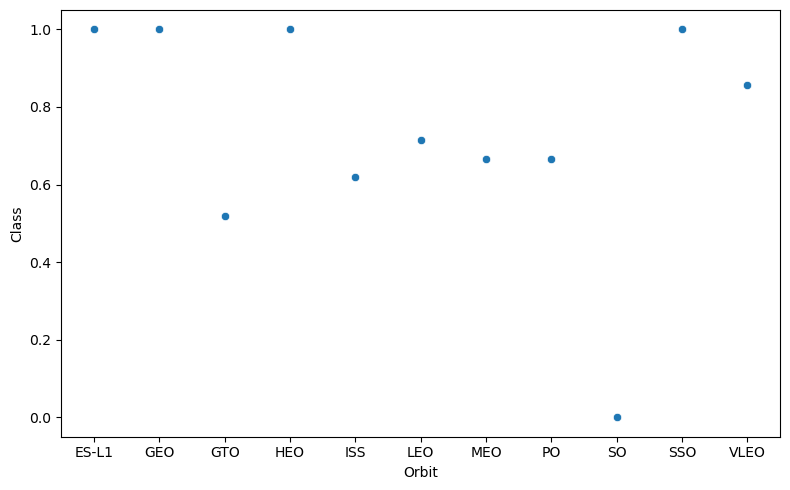

In [21]:
Success_rate=df.groupby('Orbit',as_index=False)['Class'].mean()
fig = plt.figure(figsize=(8,5))
sns.scatterplot(x='Orbit',y='Class',data=Success_rate)
plt.xlabel('Orbit')
plt.ylabel('Class')
plt.tight_layout()
plt.show()

**Observation:**  
Orbits such as ES-L1, GEO, HEO, and SSO exhibit the highest success rates, with values close to 1.0, indicating consistently successful missions.  

VLEO also shows a high success rate, though slightly lower than the top-performing orbits.  
In contrast, LEO, MEO, PO, ISS, and GTO demonstrate moderate success rates, while SO exhibits the lowest success rate among all orbit types.


## Flight Number vs Orbit Type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


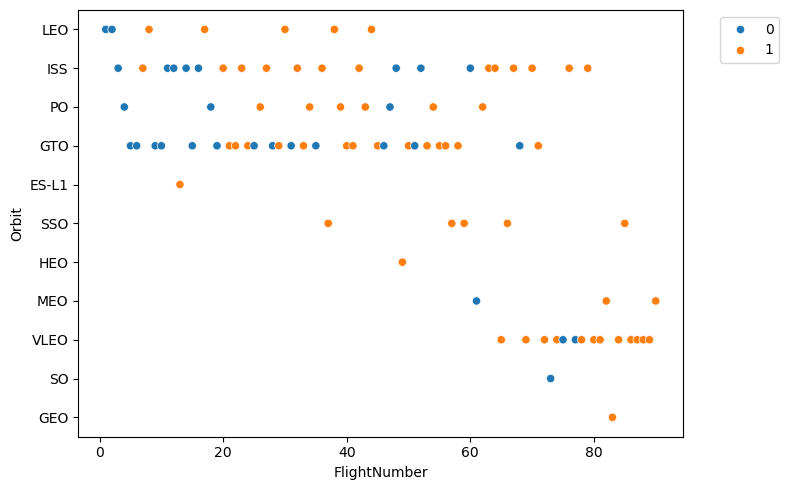

In [22]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
fig = plt.figure(figsize=(8,5))
sns.scatterplot(x='FlightNumber',y='Orbit',data=df,hue='Class')
plt.xlabel('FlightNumber')
plt.ylabel('Orbit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Key Observations

- Low Earth Orbit (LEO) missions show a clear improvement in landing success as the flight number increases, indicating learning effects and operational maturity.
- Geostationary Transfer Orbit (GTO) missions do not exhibit a strong relationship between flight number and success, suggesting higher mission complexity and tighter performance constraints.
- Other orbit types display limited data points, making trend interpretation less conclusive.


## Payload Mass vs Orbit Type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


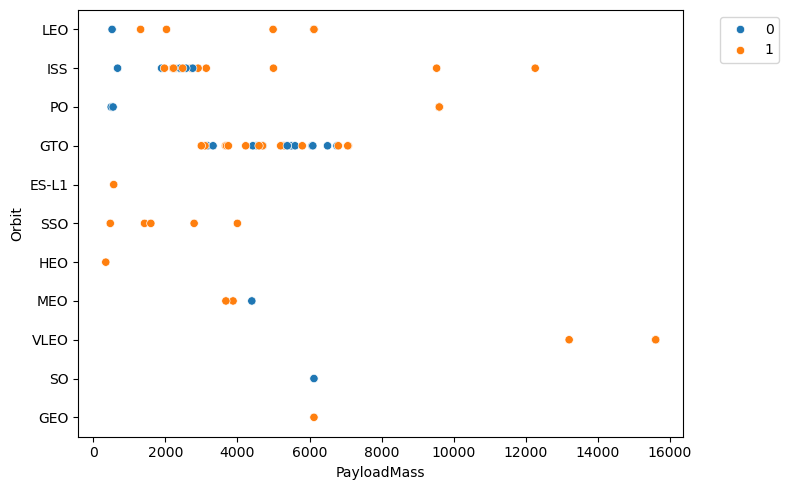

In [23]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
fig = plt.figure(figsize=(8,5))
sns.scatterplot(x='PayloadMass',y='Orbit',data=df,hue='Class')
plt.xlabel('PayloadMass')
plt.ylabel('Orbit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




## Launch Success Trend Over Time


x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


In [24]:
# A function to Extract years from the date 
df['Year'] = pd.to_datetime(df['Date']).dt.year
Yearly_success=df.groupby('Year', as_index=False)['Class'].mean()
Yearly_success.columns=['Year','success_rate']
Yearly_success.tail()

,Year,success_rate
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


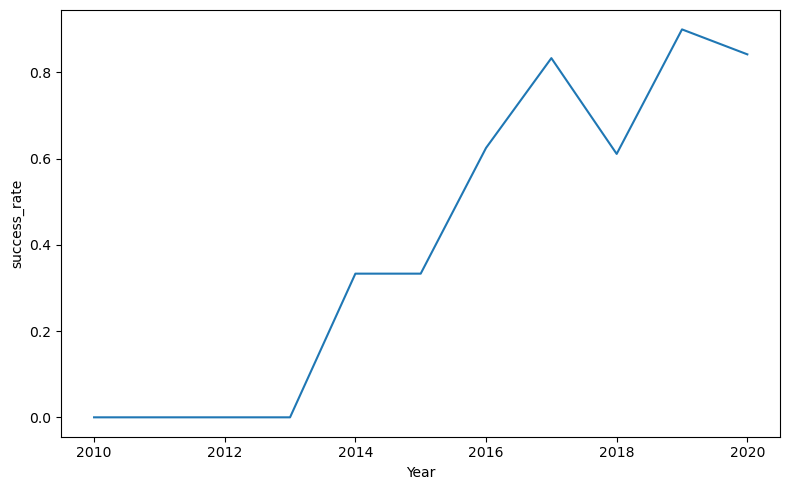

In [25]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
fig = plt.figure(figsize=(8,5))
sns.lineplot(x='Year',y='success_rate',data=Yearly_success, markers='o')
plt.xlabel('Year')
plt.ylabel('success_rate')
plt.tight_layout()
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [26]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


## Feature Encoding for Machine Learning


In [27]:
features_one_hot=features[['Orbit','LaunchSite','LandingPad','Serial']]
features_one_hot=pd.get_dummies(features_one_hot,columns=['Orbit','LaunchSite','LandingPad','Serial'],drop_first=True)
features_one_hot.head()

,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Final Feature Preparation


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [28]:
# HINT: use astype function
features_one_hot=features_one_hot.astype('float64')
features_one_hot.head()

,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create a .csv file

In [29]:
features_one_hot.to_csv('Model_3', index=False)